# MAモデル

移動平均モデルと呼ばれ、「将来のYは過去の誤差によって説明される」という考え方に基づいたアルゴリズムである。

言い換えると、「将来の予測値は、過去の予測値と実績値との誤差により決まる」であるが、

例えば、今月の売上量が、本来売上げる量より多かったら、来月は売上量が減る

次数：q

# ARモデル

自己回帰モデルと呼ばれ、「将来のYは、過去のYによって説明される」という考え方に基づいたアルゴリズムである。

言い換えると、「将来の予測値は、過去の予測値により決まる」であるが、

例えば、今月の売上量が多かったら、来月は売上量が増える

次数：p

# ARMA

自己回帰移動平均モデルと呼ばれ、MAモデルとARモデルを組み合わせたモデルである。

次数：p
次数：q

## データの読み込み

今回使用するデータは、気温の時系列データです。

データ配布元：http://www.data.jma.go.jp/gmd/risk/obsdl/index.php

**まずは、理解を容易にするため、気温データのみを用います**

In [1]:
import pandas as pd
weather_df = pd.read_csv("./data/weather.csv", encoding="shift-jis")

In [2]:
weather_df

,年月日,平均気温(℃),降水量の合計(mm),平均風速(m/s),日照時間(時間),平均現地気圧(hPa)
0,2015/1/1,3.7,0.0,4.4,1.3,1000.4
1,2015/1/2,2.7,0.0,2.1,6.0,1007.4
2,2015/1/3,3.8,0.0,3.0,8.9,1012.0
3,2015/1/4,4.0,0.0,1.3,6.0,1010.4
4,2015/1/5,6.9,0.0,2.4,8.9,1014.6
...,...,...,...,...,...,...
1822,2019/12/28,6.8,0.0,3.5,8.8,1019.9
1823,2019/12/29,7.0,0.0,1.9,8.3,1026.5
1824,2019/12/30,6.7,0.5,1.8,0.0,1021.0
1825,2019/12/31,8.2,0.0,3.6,8.6,1009.1


In [26]:
# 30日ごとの気温を取得
data=[]
for index,i in enumerate(weather_df['平均気温(℃)'].values):
    if index%30==0:
        data.append(i)
data

[3.7,
 4.9,
 9.3,
 13.9,
 20.5,
 25.7,
 22.5,
 29.1,
 20.0,
 23.3,
 20.8,
 9.9,
 7.3,
 3.8,
 3.8,
 8.0,
 18.1,
 22.2,
 22.7,
 23.9,
 26.8,
 19.4,
 16.7,
 12.6,
 10.5,
 3.0,
 6.2,
 9.1,
 15.7,
 22.1,
 22.6,
 26.5,
 26.5,
 19.0,
 13.3,
 11.6,
 7.7,
 4.2,
 6.0,
 13.2,
 17.9,
 22.3,
 20.6,
 30.1,
 27.5,
 21.0,
 20.0,
 16.3,
 4.7,
 2.0,
 0.8,
 12.3,
 5.7,
 20.6,
 17.5,
 19.7,
 29.9,
 28.4,
 20.0,
 14.3,
 8.0]

# テストデータと訓練データの分割

In [27]:
train=data[:int(len(data)*0.5)]
test=data[int(len(data)*0.5):]

## モデル作成

AR/ARMAモデルをそれぞれ作成する

In [28]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
model_ar = AR(train)
model_arma = ARMA(train, order=[1, 1])

c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATI

## モデルの学習

In [29]:
result_ar = model_ar.fit()
result_arma = model_arma.fit()

# 予測値の算出（テストデータ）

In [30]:
prediction_ar = result_ar.predict(start=len(train),end=len(data))
prediction_arma = result_arma.predict(start=len(train),end=len(data))

# 予測値の可視化

In [31]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
# グラフの日本語設定
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
plt.rcParams['figure.figsize'] = 20, 5

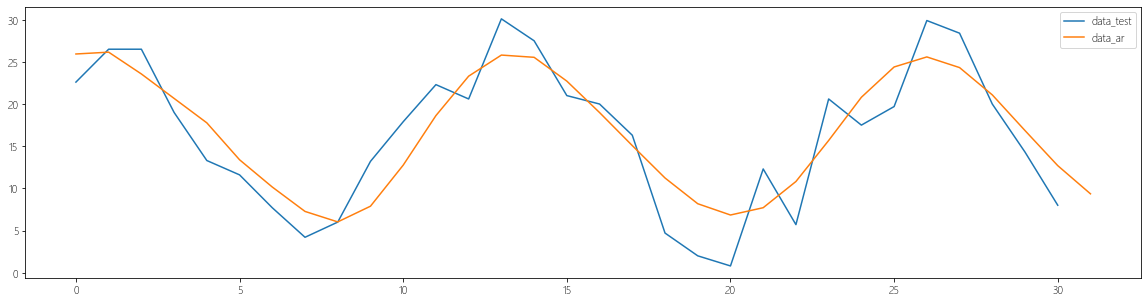

In [32]:
# AR
plt.plot(test,label="data_test")
plt.plot(prediction_ar,label="data_ar")
plt.legend()
plt.show()

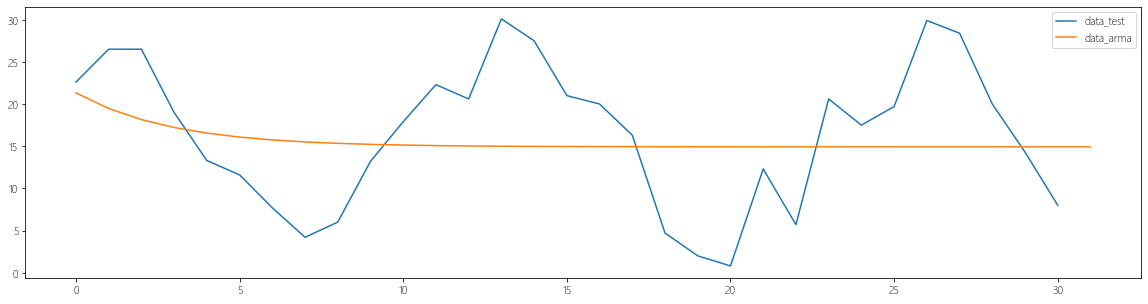

In [33]:
# ARMA
plt.plot(test,label="data_test")
plt.plot(prediction_arma,label="data_arma")
plt.legend()
plt.show()

# パラメータ調整

ARMAモデルが正常に予測できていないので、p,qを調整する

In [34]:
from statsmodels.tsa.stattools import arma_order_select_ic

arma_order_select_ic(train, max_ar=3, max_ma=7, ic='aic')

c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:548: Hessian

{'aic':             0           1           2           3           4           5  \
 0  213.103206  196.764952  190.709831  185.716739  182.703168  183.740549   
 1  188.224587  188.176158  186.588014  182.855338  183.845006  185.594059   
 2  185.641700  169.740844  162.183024  163.542359  165.506345  168.505058   
 3  177.777668  163.719347         NaN         NaN  166.920587  189.364130   
 
             6           7  
 0  184.434676  183.599232  
 1  187.787026  190.245529  
 2  189.686085  171.696250  
 3  191.364099  173.590313  , 'aic_min_order': (2, 2)}

In [36]:
#モデルの定義
model_arma = ARMA(train, order=[2, 2])
# モデルの学習
result_arma = model_arma.fit()
# 予測値の算出
prediction_arma = result_arma.predict(start=len(train),end=len(data))

c:\users\mio\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


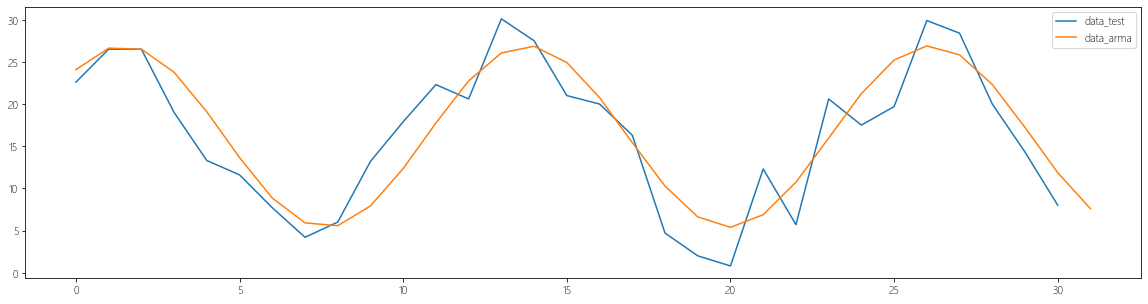

In [37]:
# ARMA
plt.plot(test,label="data_test")
plt.plot(prediction_arma,label="data_arma")
plt.legend()
plt.show()